In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import nltk

data = pd.read_csv('overview_feature_table.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data


,id,original_title,release_date,runtime,genres,budget,revenue,vote_average,vote_count,popularity,...,wordcount,avg_sent_length,adjectives,nouns,adjective_ratio,noun_ratio,ellipses,exclamation_points,unusual_punctuation,unusual_punctuation_count
0,1891,The Empire Strikes Back,1980-05-20,124,"Adventure,Action,Fiction",18000000,538400000,8.4,14567,26.960,...,60,23.333333,"['evil', 'galactic', 'darth', 'determined', 'r...","['epic', 'saga', 'luke', 'skywalker', 'hopes',...",0.150000,0.383333,0,0,[],0
1,8536,Superman II,1980-12-04,127,"Fiction,Action,Adventure",54000000,190458706,6.7,1874,16.237,...,61,22.666667,"['escaped', 'general', 'white', 'lex', 'superm...","['criminals', 'planet', 'krypton', 'man', 'ste...",0.098361,0.278689,0,0,[],0
2,525,The Blues Brothers,1980-06-16,133,"Music,Comedy,Action,Crime",27000000,115229890,7.8,3498,12.911,...,25,28.000000,['old'],"['jake', 'blues', 'prison', 'band', 'catholic'...",0.040000,0.320000,0,0,[],0
3,19494,Nine to Five,1980-12-18,110,Comedy,10000000,103300000,6.9,380,8.547,...,50,18.000000,"['frank', 'own', 'long']","['hart', 'pig', 'advantage', 'manner', 'women'...",0.060000,0.240000,0,0,['?'],1
4,21629,Stir Crazy,1980-12-12,111,Comedy,10000000,101300000,6.5,345,11.162,...,60,33.500000,['new'],"['yorkers', 'donahue', 'harry', 'monroe', 'job...",0.016667,0.333333,0,0,['—'],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7964,858015,Dashcam,2022-06-03,80,"Horror,Thriller",100000,58156,5.3,32,7.099,...,40,45.000000,"['self-deluded', 'musician', 'fateful', 'elder...","['start', 'pandemic', 'indulgent', 'livestream...",0.100000,0.300000,0,0,[],0
7965,989685,Nobody Panic!,2022-06-01,124,"Comedy,Mystery",50,1687,10.0,1,0.600,...,59,21.333333,"['high', 'detective', 'eccentric']","['star', 'school', 'play', 'drops', 'middle', ...",0.050847,0.322034,0,0,['?'],1
7966,930020,Night Vacation 2,2022-09-03,105,"Comedy,Adventure,Crime,Action",1000,100,9.0,1,2.697,...,31,39.000000,"['long', 'mysterious']","['crew', 'vacation', 'building', 'house', 'con...",0.064516,0.290323,0,0,"['""', '"",']",2
7967,1014358,Spymate 2,2022-08-19,72,"Drama,Action,Comedy,Thriller",10,50,10.0,1,0.703,...,46,10.800000,['chimpossible'],"['syndicate', 'minkey', 'family', 'criminals',...",0.021739,0.304348,0,0,['?'],1


In [ ]:
model_bayes = nltk.NaiveBayesClassifier.train(training_set)

<p>The highest 20% of movies are defined as 'good'. We calculate a percentile that divides the movies into good and bad. </p> 

In [3]:
goodness_data = pd.read_csv('data_processed_final.csv')
goodness_data = goodness_data[['original_title', 'gross_factor', 'pop_factor', 'freshness_factor', 'runtime_factor', 'goodness_factor']]

goodness_data

,original_title,gross_factor,pop_factor,freshness_factor,runtime_factor,goodness_factor
0,The Empire Strikes Back,7.728577,9.363771,0.0,3.041540,5.033472
1,Superman II,4.621564,7.543885,0.0,2.737821,3.725817
2,The Blues Brothers,4.066786,8.164259,0.0,2.258017,3.622266
3,Nine to Five,4.128616,6.291961,0.0,10.000000,5.105144
4,Stir Crazy,4.104337,6.166992,0.0,6.895361,4.291672
...,...,...,...,...,...,...
7964,Dashcam,2.778435,4.103237,10.0,1.843725,4.681349
7965,Nobody Panic!,2.778646,1.840491,10.0,3.041540,4.415169
7966,Night Vacation 2,2.778634,1.756274,10.0,4.699377,4.808571
7967,Spymate 2,2.778639,1.840491,10.0,1.448564,4.016923


In [4]:
goodness_threshold = goodness_data.goodness_factor.mean() + 0.5 * goodness_data.goodness_factor.std()
print(goodness_threshold)
goodness_data['good'] = goodness_data.goodness_factor.apply(lambda x: 'good' if x>goodness_threshold else 'bad')
print(goodness_data.good.value_counts())

goodness_data.to_csv('goodness_data.csv')

5.639229338888012
bad     5521
good    2448
Name: good, dtype: int64


In [5]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data, goodness_data)
y_test.info()

features_using = ['wordcount', 'avg_sent_length', 'adjective_ratio', 'noun_ratio', 'ellipses', 'exclamation_points', 'unusual_punctuation_count']
x_train = x_train[features_using]
x_test = x_test[features_using]
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 7384 to 3114
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   original_title    1993 non-null   object 
 1   gross_factor      1993 non-null   float64
 2   pop_factor        1993 non-null   float64
 3   freshness_factor  1993 non-null   float64
 4   runtime_factor    1993 non-null   float64
 5   goodness_factor   1993 non-null   float64
 6   good              1993 non-null   object 
dtypes: float64(5), object(2)
memory usage: 124.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 3375 to 2220
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   wordcount                  5976 non-null   int64  
 1   avg_sent_length            5976 non-null   float64
 2   adjective_ratio            5976 non-null   float64
 3   noun_ratio          

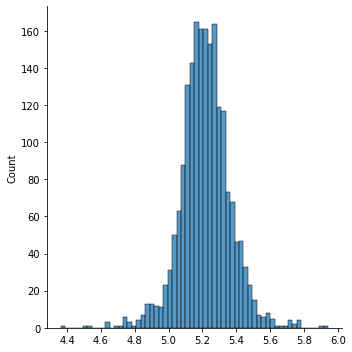

In [6]:
from sklearn.linear_model import LinearRegression

#Fit on the training data set, with:
#X : {array-like, sparse matrix}, shape (n_samples, n_features) , n_samples rows x n_features columns
#with attributes that describe each sample.
#y : array-like, shape (n_samples,) , n_samples target values for each sample.

model_linear = LinearRegression()

model_linear.fit(x_train[features_using], y_train.goodness_factor) 

linear_pred = model_linear.predict(x_test)

sns.displot(data=linear_pred)

In [7]:
from sklearn.linear_model import LogisticRegression

#Fit on the training data set, with:
#X : {array-like, sparse matrix}, shape (n_samples, n_features) , n_samples rows x n_features columns
#with attributes that describe each sample.
#y : array-like, shape (n_samples,) , n_samples target values for each sample.

model_logistic = LogisticRegression()

model_logistic.fit(x_train[features_using], y_train.good) 

log_pred = model_logistic.predict(x_test)

In [8]:
cnf_matrix = sklearn.metrics.confusion_matrix(y_test.good, log_pred)
print(cnf_matrix)

print("Accuracy:", sklearn.metrics.accuracy_score(y_test.good, log_pred))

#0.79
# 0.7902659307576518
# 0.8138484696437531
# 0.8128449573507276
# 0.8073256397390868

unique, counts = np.unique(log_pred, return_counts=True)

print(np.asarray((unique, counts)).T)

[[1356   10]
 [ 624    3]]
Accuracy: 0.6818866031108881
[['bad' 1980]
 ['good' 13]]


In [15]:
model_linear.coef_




array([-7.79620884e-04,  1.31567500e-02,  9.30871312e-01, -2.96658844e-01,
       -5.25837381e-02, -9.41082880e-02, -4.68575500e-02])

In [ ]:
bayes_features = x_train[features_using].to_dict(orient='records')
bayes_features
model_bayes = nltk.NaiveBayesClassifier.train(bayes_features, y_train.good)

ValueError: ignored

In [11]:
import statsmodels.api as sm

#define response variable
y = y_train['goodness_factor']

#define predictor variables
x = x_train[features_using]

# strong multicollinearity - wordcount tai adjective_ratio poistaminen auttaa

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        goodness_factor   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     27.74
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           8.43e-38
Time:                        07:44:08   Log-Likelihood:                -7295.5
No. Observations:                5976   AIC:                         1.461e+04
Df Residuals:                    5968   BIC:                         1.466e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
data[features_using].corr()

,wordcount,avg_sent_length,adjective_ratio,noun_ratio,ellipses,exclamation_points,unusual_punctuation_count
wordcount,1.000000,0.119716,-0.105518,-0.143687,0.124092,0.118007,0.388701
avg_sent_length,0.119716,1.000000,0.032171,-0.009570,-0.023057,-0.038092,0.108383
adjective_ratio,-0.105518,0.032171,1.000000,-0.048836,-0.024879,-0.014322,0.004185
noun_ratio,-0.143687,-0.009570,-0.048836,1.000000,-0.019814,-0.014177,0.046975
ellipses,0.124092,-0.023057,-0.024879,-0.019814,1.000000,0.139147,0.253884
exclamation_points,0.118007,-0.038092,-0.014322,-0.014177,0.139147,1.000000,0.213651
unusual_punctuation_count,0.388701,0.108383,0.004185,0.046975,0.253884,0.213651,1.000000
